In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
#read application data
app_data = pd.read_csv('application_data.csv')
#read customer previous application data
prev_data = pd.read_csv('previous_application.csv')


In [3]:
#Check the loaded data
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
#inspect the column/data types
app_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nu

In [5]:
app_data["TARGET"].value_counts(normalize=True)

0    0.919271
1    0.080729
Name: TARGET, dtype: float64

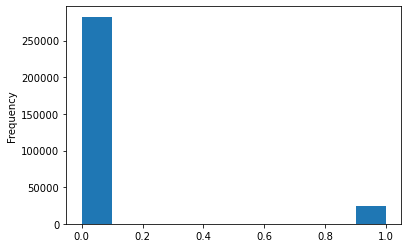

In [6]:
app_data['TARGET'].astype(int).plot.hist();

In [7]:
# Data cleaning.

null_count = app_data.isnull().sum().to_frame()
for index, row in null_count.iterrows():
    print(index, row[0])

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
OWN_CAR_AGE 202929
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
OCCUPATION_TYPE 96391
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_1 173378
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
APARTMENTS_AVG 156061
BASEMENTAREA_AVG 179943
YEARS_BEGINEXPLUATATION_AVG 150007
YEARS_BUILD_AVG 204488
COMMONAREA_AVG 214865
ELE

 # Fixing rows and columns & Handling null values: 
 
From the above analysis of null values, we could see there are some columns with significant amount of null values.
Either a column is Numerical or Categorical, we can delete the observations having null values in the dataset or the column that is having more number of null values.
#.i.e more than half or 30%.
# References for handling null values:  
(https://medium.com/bycodegarage/a-comprehensive-guide-on-handling-missing-values-b1257a4866d1)



In [8]:
#calculate the percentage of null values in columns.
# Drop the columns with more than 30% of null values.

cols_null = app_data.isnull().sum()/len(app_data)*100
cols_null = cols_null[cols_null.values > 30.0]
print(len(cols_null))
print(cols_null)

50
OWN_CAR_AGE                     65.990810
OCCUPATION_TYPE                 31.345545
EXT_SOURCE_1                    56.381073
APARTMENTS_AVG                  50.749729
BASEMENTAREA_AVG                58.515956
YEARS_BEGINEXPLUATATION_AVG     48.781019
YEARS_BUILD_AVG                 66.497784
COMMONAREA_AVG                  69.872297
ELEVATORS_AVG                   53.295980
ENTRANCES_AVG                   50.348768
FLOORSMAX_AVG                   49.760822
FLOORSMIN_AVG                   67.848630
LANDAREA_AVG                    59.376738
LIVINGAPARTMENTS_AVG            68.354953
LIVINGAREA_AVG                  50.193326
NONLIVINGAPARTMENTS_AVG         69.432963
NONLIVINGAREA_AVG               55.179164
APARTMENTS_MODE                 50.749729
BASEMENTAREA_MODE               58.515956
YEARS_BEGINEXPLUATATION_MODE    48.781019
YEARS_BUILD_MODE                66.497784
COMMONAREA_MODE                 69.872297
ELEVATORS_MODE                  53.295980
ENTRANCES_MODE                 

In [9]:
# fetch the columns with 30% or more null values.
cols_null = list(cols_null[cols_null.values > 30.0].index)
cols_null

['OWN_CAR_AGE',
 'OCCUPATION_TYPE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MO

In [10]:
# Drop the columns:

app_data.drop(columns=cols_null,axis=1,inplace=True)


In [11]:
# Check the dataframe and null values again.
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [12]:
# Check for null values again
null_count = app_data.isnull().sum().to_frame()
for index, row in null_count.iterrows():
    print(index, row[0])

SK_ID_CURR 0
TARGET 0
NAME_CONTRACT_TYPE 0
CODE_GENDER 0
FLAG_OWN_CAR 0
FLAG_OWN_REALTY 0
CNT_CHILDREN 0
AMT_INCOME_TOTAL 0
AMT_CREDIT 0
AMT_ANNUITY 12
AMT_GOODS_PRICE 278
NAME_TYPE_SUITE 1292
NAME_INCOME_TYPE 0
NAME_EDUCATION_TYPE 0
NAME_FAMILY_STATUS 0
NAME_HOUSING_TYPE 0
REGION_POPULATION_RELATIVE 0
DAYS_BIRTH 0
DAYS_EMPLOYED 0
DAYS_REGISTRATION 0
DAYS_ID_PUBLISH 0
FLAG_MOBIL 0
FLAG_EMP_PHONE 0
FLAG_WORK_PHONE 0
FLAG_CONT_MOBILE 0
FLAG_PHONE 0
FLAG_EMAIL 0
CNT_FAM_MEMBERS 2
REGION_RATING_CLIENT 0
REGION_RATING_CLIENT_W_CITY 0
WEEKDAY_APPR_PROCESS_START 0
HOUR_APPR_PROCESS_START 0
REG_REGION_NOT_LIVE_REGION 0
REG_REGION_NOT_WORK_REGION 0
LIVE_REGION_NOT_WORK_REGION 0
REG_CITY_NOT_LIVE_CITY 0
REG_CITY_NOT_WORK_CITY 0
LIVE_CITY_NOT_WORK_CITY 0
ORGANIZATION_TYPE 0
EXT_SOURCE_2 660
EXT_SOURCE_3 60965
OBS_30_CNT_SOCIAL_CIRCLE 1021
DEF_30_CNT_SOCIAL_CIRCLE 1021
OBS_60_CNT_SOCIAL_CIRCLE 1021
DEF_60_CNT_SOCIAL_CIRCLE 1021
DAYS_LAST_PHONE_CHANGE 1
FLAG_DOCUMENT_2 0
FLAG_DOCUMENT_3 0
FLAG_DOCU

In [13]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [14]:
# Number of each type of column
app_data.dtypes.value_counts()

int64      41
float64    20
object     11
dtype: int64

In [15]:
# Number of unique classes in each object column
app_data.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
dtype: int64

In [16]:
#Handling missing values 
app_data[app_data['AMT_ANNUITY'].isnull()].TARGET.value_counts()

0    12
Name: TARGET, dtype: int64

In [17]:
app_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [18]:
# there are outliers.Hence checking the percentile values.
app_data.AMT_ANNUITY.quantile([0.5,0.7,0.9,0.95,0.99])

0.50    24903.0
0.70    32004.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [19]:
app_data[app_data['AMT_ANNUITY'] >= 70006.5]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
60,100071,0,Cash loans,F,N,Y,0,180000.0,1663987.5,86989.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0
112,100132,0,Cash loans,F,N,Y,0,202500.0,1136439.0,73611.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
189,100219,0,Cash loans,M,N,Y,1,315000.0,2250000.0,83515.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
191,100221,0,Cash loans,F,N,Y,0,225000.0,684054.0,77494.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
485,100559,0,Cash loans,F,Y,Y,0,450000.0,2286211.5,116266.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307002,455682,0,Cash loans,M,Y,N,0,546250.5,1800000.0,166572.0,...,1,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307055,455739,0,Cash loans,F,N,Y,0,112500.0,2032992.0,70794.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
307069,455759,0,Cash loans,F,N,Y,0,130500.0,1350000.0,70033.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
307165,455868,0,Cash loans,F,Y,Y,0,337500.0,1890000.0,71986.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0


Since there are outliers in the data, mean will be affected hence imputing with median values.<br>
(This can be left as null also as the amount of null value is very low)

In [20]:
# Since there are outliers in the data, mean will be affected hence imputing with median values.
AMT_ANNUITY_FILL = app_data['AMT_ANNUITY'].median()
app_data['AMT_ANNUITY'].fillna(value = AMT_ANNUITY_FILL, inplace =True)

In [21]:
# Check the data again.
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [22]:
# Null value handling:CNT_FAM_MEMBERS.
# Converting the data to integer as it can't be float.
CNT_FAM_MEMBERS_mode = app_data.CNT_FAM_MEMBERS.mode()[0]
app_data.CNT_FAM_MEMBERS.fillna(CNT_FAM_MEMBERS_mode,inplace = True)
app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].astype(int)

In [23]:
# Check the data again.
app_data.CNT_FAM_MEMBERS.isnull().sum()

0

In [24]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307511 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [25]:
app_data['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [26]:
gender_mode = app_data.CODE_GENDER.mode()[0]
gender_mode
app_data.CODE_GENDER = app_data.CODE_GENDER.replace('XNA',gender_mode)

Handling missing vaues of categorical variables. Missing values may not be present always as null. "XNA" is a missing value. Since CODE_GENDER is a categorical column replacing it with mode.

In [27]:
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

In [28]:
app_data['DAYS_LAST_PHONE_CHANGE'].isnull().sum()

1

DAYS_LAST_PHONE_CHANGE . Null value is not replaced as there is only one record and doent seems to have an influence on the target variable.

# Handling Anomalies 

In [29]:
# DAYS_BIRTH: This field has only negative values. In ideal case this has to be consulted with business. <br>
# Time being since its all negative numbers we assume this can be converted to positive. <br>

app_data['DAYS_BIRTH'] = app_data['DAYS_BIRTH'].abs()
app_data['DAYS_BIRTH_YEAR'] = app_data['DAYS_BIRTH'].apply(lambda x: int(x/365) )


In [30]:
app_data['DAYS_BIRTH'].describe()

count    307511.000000
mean      16036.995067
std        4363.988632
min        7489.000000
25%       12413.000000
50%       15750.000000
75%       19682.000000
max       25229.000000
Name: DAYS_BIRTH, dtype: float64

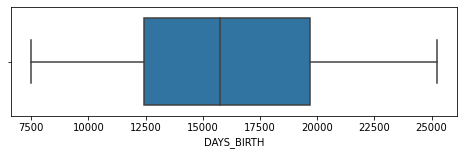

In [31]:
plt.figure(figsize = [8,2])
sns.boxplot(app_data['DAYS_BIRTH'])

plt.show()

In [32]:
app_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

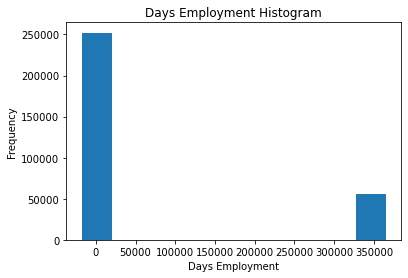

In [33]:
app_data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [34]:
anom = app_data[app_data['DAYS_EMPLOYED'] == 365243]
non_anom = app_data[app_data['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


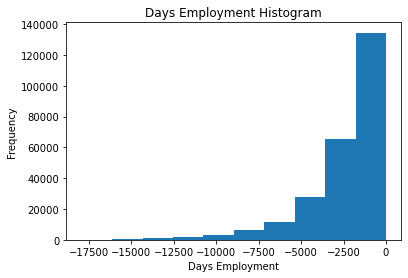

In [35]:
# Create an anomalous flag column
app_data['DAYS_EMPLOYED_ANOM'] = app_data["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
app_data['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

app_data['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

In [36]:
app_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [37]:
#correcting the display of describe function
app_data['AMT_INCOME_TOTAL'].describe().apply("{0:.1f}".format)

count       307511.0
mean        168797.9
std         237123.1
min          25650.0
25%         112500.0
50%         147150.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: object

In [38]:
# To get a better understanding using quantile function.
app_data.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [39]:
# Since there is a wide spread for income amount, binning the values so as to get a better insight
# Treating numeric variables as categories.
income_bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
income_slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
               '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
               '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_data['AMT_INCOME_BINS'] = pd.cut(app_data['AMT_INCOME_TOTAL'],income_bins,labels=income_slot)

In [40]:
# Creating bins for ages
age_bins = [0,25,40,55,70]
age_slot = ['<25','25-40','40-55','>50']
app_data['DAYS_BIRTH_YEAR'] = pd.cut(app_data['DAYS_BIRTH_YEAR'],age_bins,labels=age_slot)

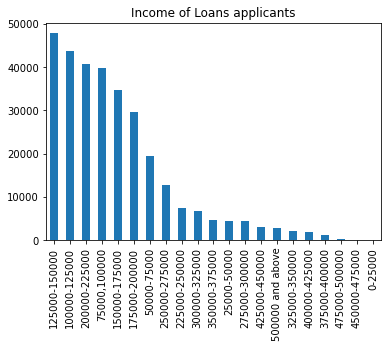

In [41]:
app_data.AMT_INCOME_BINS.value_counts().plot.bar()
plt.title('Income of Loans applicants')
plt.show()

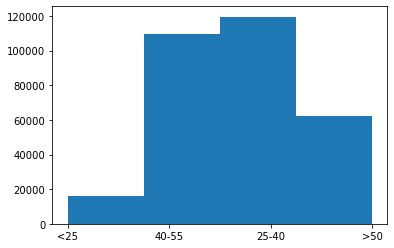

In [42]:
plt.hist(app_data['DAYS_BIRTH_YEAR'], bins = 4)
plt.show()

# Univariate analysis: 

In [43]:
#There is a huge difference between min and max value.Till 75% data seems to have an increment in constant propotions. 
#From 75 to max() again is a huge difference
app_data.AMT_ANNUITY.describe()

count    307511.000000
mean      27108.487841
std       14493.461065
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

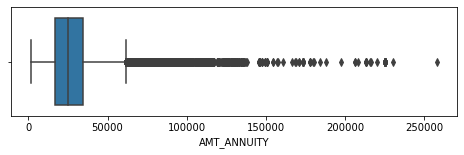

In [44]:
# Box plot to analyse the spread of data.
plt.figure(figsize = [8,2])
sns.boxplot(app_data['AMT_ANNUITY'])

plt.show()

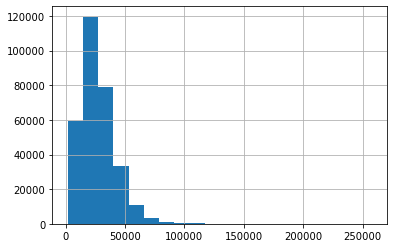

In [45]:
app_data['AMT_ANNUITY'].hist(bins=20)

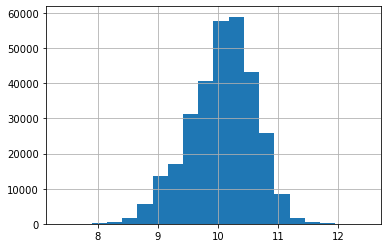

In [46]:
app_data['AMT_ANNUITY_LOG'] = np.log(app_data['AMT_ANNUITY'])
app_data['AMT_ANNUITY_LOG'].hist(bins=20)

In [47]:
# As observed from the box plots there are outliers.Hence checking the percentile values.
app_data.AMT_ANNUITY.quantile([0.5,0.7,0.9,0.95,0.99])

0.50    24903.0
0.70    32004.0
0.90    45954.0
0.95    53325.0
0.99    70006.5
Name: AMT_ANNUITY, dtype: float64

In [48]:
app_data[app_data['AMT_ANNUITY'] >= 70006.5]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_YEAR,DAYS_EMPLOYED_ANOM,AMT_INCOME_BINS,AMT_ANNUITY_LOG
60,100071,0,Cash loans,F,N,Y,0,180000.0,1663987.5,86989.5,...,0.0,0.0,0.0,2.0,0.0,1.0,40-55,False,175000-200000,11.373543
112,100132,0,Cash loans,F,N,Y,0,202500.0,1136439.0,73611.0,...,0.0,0.0,0.0,0.0,0.0,1.0,>50,False,200000-225000,11.206550
189,100219,0,Cash loans,M,N,Y,1,315000.0,2250000.0,83515.5,...,0.0,0.0,0.0,0.0,0.0,3.0,25-40,False,300000-325000,11.332788
191,100221,0,Cash loans,F,N,Y,0,225000.0,684054.0,77494.5,...,0.0,0.0,0.0,0.0,1.0,4.0,>50,False,200000-225000,11.257962
485,100559,0,Cash loans,F,Y,Y,0,450000.0,2286211.5,116266.5,...,NaN,NaN,NaN,NaN,NaN,NaN,>50,False,425000-450000,11.663640
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307002,455682,0,Cash loans,M,Y,N,0,546250.5,1800000.0,166572.0,...,NaN,NaN,NaN,NaN,NaN,NaN,25-40,False,500000 and above,12.023183
307055,455739,0,Cash loans,F,N,Y,0,112500.0,2032992.0,70794.0,...,0.0,0.0,0.0,0.0,0.0,5.0,40-55,False,100000-125000,11.167530
307069,455759,0,Cash loans,F,N,Y,0,130500.0,1350000.0,70033.5,...,0.0,0.0,0.0,1.0,0.0,2.0,40-55,False,125000-150000,11.156729
307165,455868,0,Cash loans,F,Y,Y,0,337500.0,1890000.0,71986.5,...,0.0,0.0,0.0,0.0,1.0,4.0,25-40,False,325000-350000,11.184234


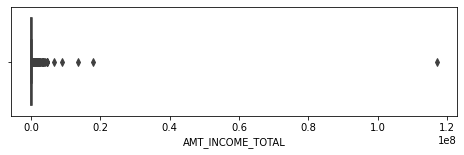

In [49]:
#Income variable has to be analysed as this may influence defaulter.
plt.figure(figsize = [8,2])
sns.boxplot(app_data['AMT_INCOME_TOTAL'])

plt.show()

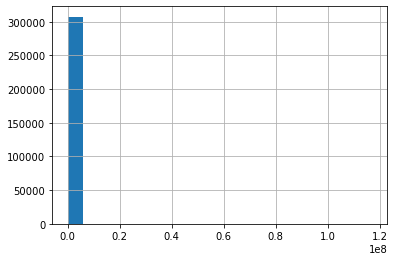

In [50]:
app_data['AMT_INCOME_TOTAL'].hist(bins=20)

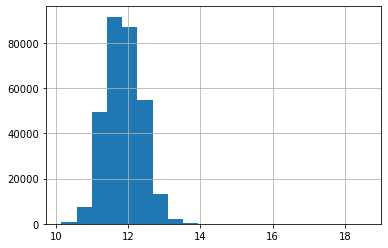

In [51]:
app_data['AMT_INCOME_TOTAL_LOG'] = np.log(app_data['AMT_INCOME_TOTAL'])
app_data['AMT_INCOME_TOTAL_LOG'].hist(bins=20)

In [52]:
app_data.AMT_INCOME_TOTAL.describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [53]:
#correcting the display of describe function
app_data['AMT_INCOME_TOTAL'].describe().apply("{0:.1f}".format)

count       307511.0
mean        168797.9
std         237123.1
min          25650.0
25%         112500.0
50%         147150.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: object

In [54]:
# To get a better understanding using quantile function.
app_data.AMT_INCOME_TOTAL.quantile([0.5,0.7,0.9,0.95,0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

Observation : Income is on higher side for 1 percentage. 

In [55]:
# Since there is a wide spread for income amount, binning the values so as to get a better insight
# Treating numeric variables as categories.
income_bins = [0,25000,50000,75000,100000,125000,150000,175000,200000,225000,250000,275000,300000,325000,350000,375000,400000,425000,450000,475000,500000,10000000000]
income_slot = ['0-25000', '25000-50000','50000-75000','75000,100000','100000-125000', '125000-150000', '150000-175000','175000-200000',
               '200000-225000','225000-250000','250000-275000','275000-300000','300000-325000','325000-350000','350000-375000',
               '375000-400000','400000-425000','425000-450000','450000-475000','475000-500000','500000 and above']

app_data['AMT_INCOME_BINS'] = pd.cut(app_data['AMT_INCOME_TOTAL'],income_bins,labels=income_slot)

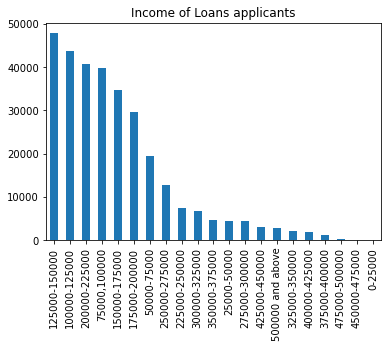

In [56]:
app_data.AMT_INCOME_BINS.value_counts().plot.bar()
plt.title('Income of Loans applicants')
plt.show()

In [57]:
# NAME_CONTRACT_TYPE
app_data['NAME_CONTRACT_TYPE'].value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

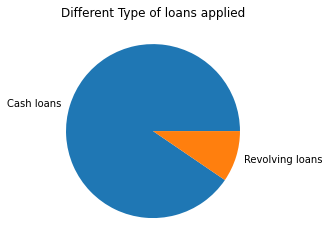

In [58]:
app_data.NAME_CONTRACT_TYPE.value_counts(normalize= True).plot.pie(label = '')
plt.title('Different Type of loans applied')
plt.show()

In [59]:
# Gender.
app_data['CODE_GENDER'].value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

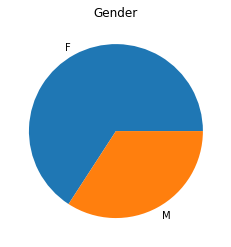

In [60]:
app_data.CODE_GENDER.value_counts(normalize= True).plot.pie(label = '')
plt.title('Gender')
plt.show()

In [61]:
# Education type.
app_data['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

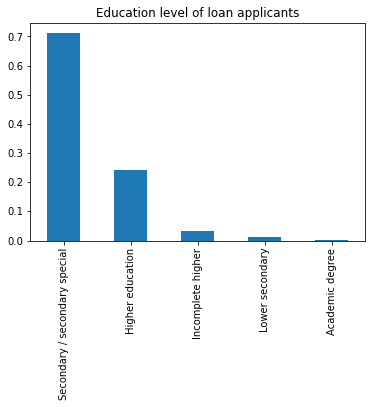

In [62]:
app_data.NAME_EDUCATION_TYPE.value_counts(normalize=True).plot.bar()
plt.title('Education level of loan applicants')
plt.show()

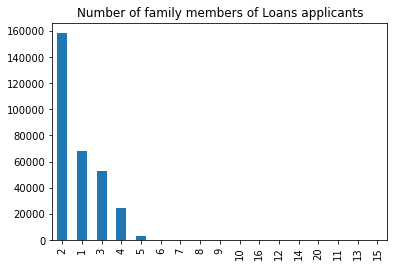

In [63]:
 # Family Members
app_data.CNT_FAM_MEMBERS.value_counts().plot.bar()
plt.title('Number of family members of Loans applicants')
plt.show()

In [64]:
#family_status/marital_status.
app_data['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

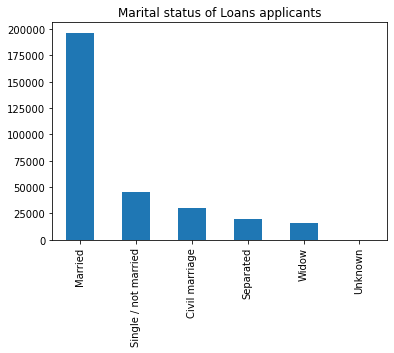

In [65]:
app_data['NAME_FAMILY_STATUS'].value_counts().plot.bar()
plt.title('Marital status of Loans applicants')
plt.show()

In [66]:
#NAME_INCOME_TYPE.
app_data['NAME_INCOME_TYPE'].value_counts()

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

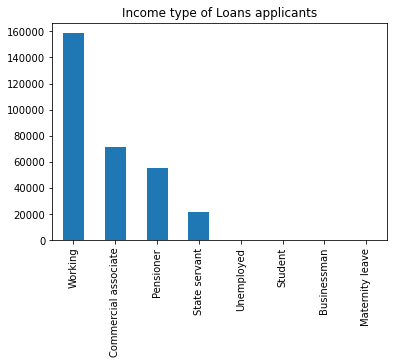

In [67]:
app_data['NAME_INCOME_TYPE'].value_counts().plot.bar()
plt.title('Income type of Loans applicants')
plt.show()

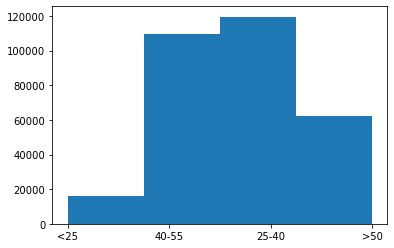

In [68]:
plt.hist(app_data['DAYS_BIRTH_YEAR'], bins = 4)
plt.show()

# Bivariate Analysis: 

In [69]:
Defaulter = app_data[app_data['TARGET'] == 1]
Defaulter.reset_index(inplace = True)
Defaulter

Non_Defaulter = app_data[app_data['TARGET'] == 0]
Non_Defaulter.reset_index(inplace = True)
Non_Defaulter

,index,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,...,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH_YEAR,DAYS_EMPLOYED_ANOM,AMT_INCOME_BINS,AMT_ANNUITY_LOG,AMT_INCOME_TOTAL_LOG
0,1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,...,0.0,0.0,0.0,0.0,0.0,40-55,False,250000-275000,10.482864,12.506177
1,2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,...,0.0,0.0,0.0,0.0,0.0,40-55,False,50000-75000,8.817298,11.119883
2,3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,...,NaN,NaN,NaN,NaN,NaN,40-55,False,125000-150000,10.298448,11.813030
3,4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,...,0.0,0.0,0.0,0.0,0.0,40-55,False,100000-125000,9.992665,11.707670
4,5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,...,0.0,0.0,0.0,1.0,1.0,40-55,False,"75000,100000",10.222577,11.502875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
282681,307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,...,0.0,0.0,2.0,0.0,0.0,>50,True,100000-125000,10.001068,11.630709
282682,307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,...,NaN,NaN,NaN,NaN,NaN,<25,False,150000-175000,10.224048,11.967181
282683,307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,...,NaN,NaN,NaN,NaN,NaN,>50,True,50000-75000,9.392787,11.184421
282684,307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,...,0.0,0.0,1.0,0.0,1.0,40-55,False,150000-175000,10.308252,11.938193


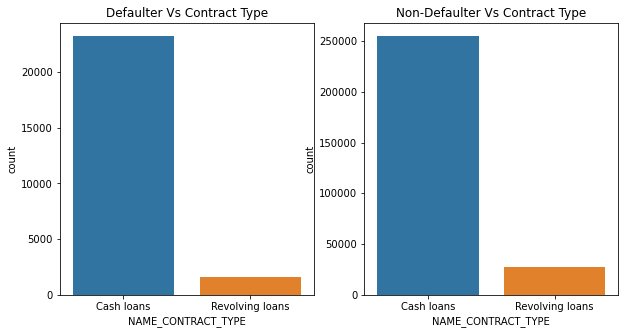

In [70]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Defaulter Vs Contract Type")
sns.countplot('NAME_CONTRACT_TYPE', data=Defaulter)
plt.subplot(1,2,2)
plt.title("Non-Defaulter Vs Contract Type")
sns.countplot('NAME_CONTRACT_TYPE', data=Non_Defaulter)
plt.show()

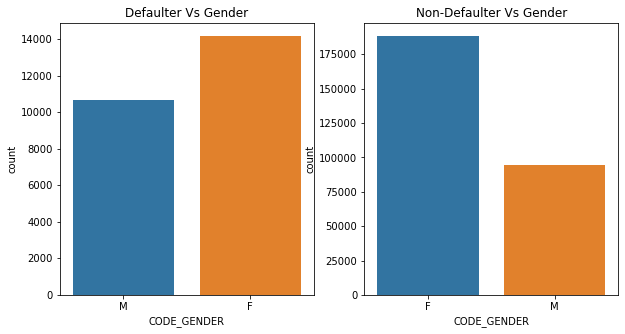

In [71]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Defaulter Vs Gender")
sns.countplot('CODE_GENDER', data=Defaulter)
plt.subplot(1,2,2)
plt.title("Non-Defaulter Vs Gender")
sns.countplot('CODE_GENDER', data=Non_Defaulter)
plt.show()

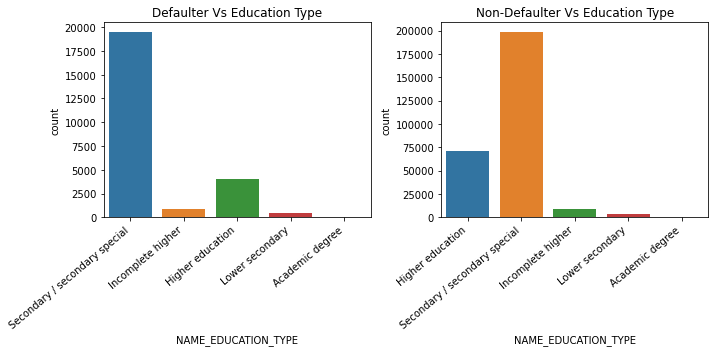

In [72]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Defaulter Vs Education Type")
ax=sns.countplot('NAME_EDUCATION_TYPE', data=Defaulter)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.subplot(1,2,2)
plt.title("Non-Defaulter Vs Education Type")
ax=sns.countplot('NAME_EDUCATION_TYPE', data=Non_Defaulter)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

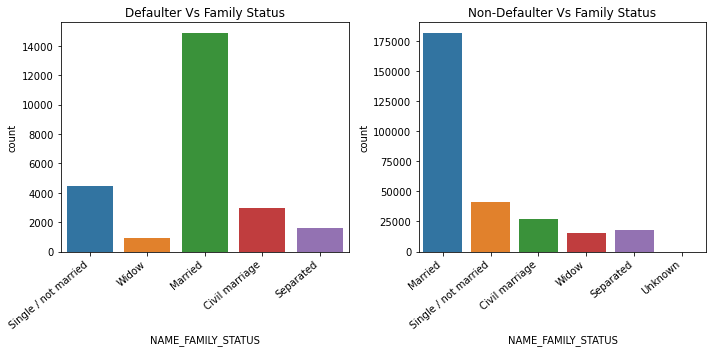

In [73]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Defaulter Vs Family Status")
ax=sns.countplot('NAME_FAMILY_STATUS', data=Defaulter)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.subplot(1,2,2)
plt.title("Non-Defaulter Vs Family Status")
ax=sns.countplot('NAME_FAMILY_STATUS', data=Non_Defaulter)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

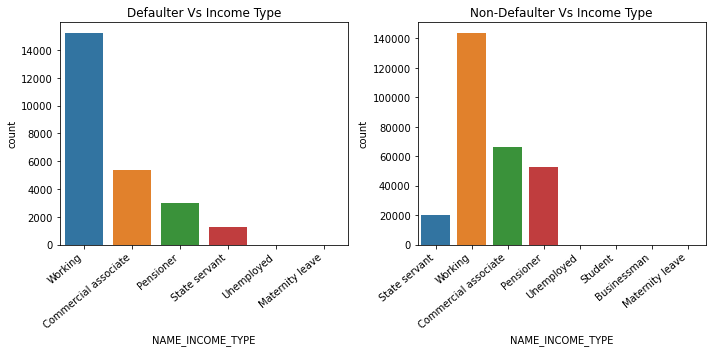

In [74]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Defaulter Vs Income Type")
ax=sns.countplot('NAME_INCOME_TYPE', data=Defaulter)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.subplot(1,2,2)
plt.title("Non-Defaulter Vs Income Type")
ax=sns.countplot('NAME_INCOME_TYPE', data=Non_Defaulter)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

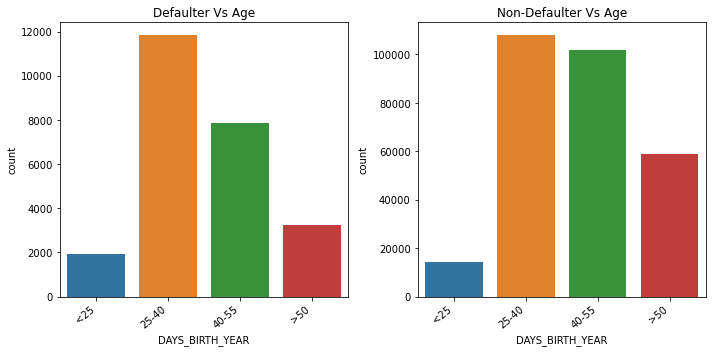

In [75]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Defaulter Vs Age")
ax=sns.countplot('DAYS_BIRTH_YEAR', data=Defaulter)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.subplot(1,2,2)
plt.title("Non-Defaulter Vs Age")
ax=sns.countplot('DAYS_BIRTH_YEAR', data=Non_Defaulter)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

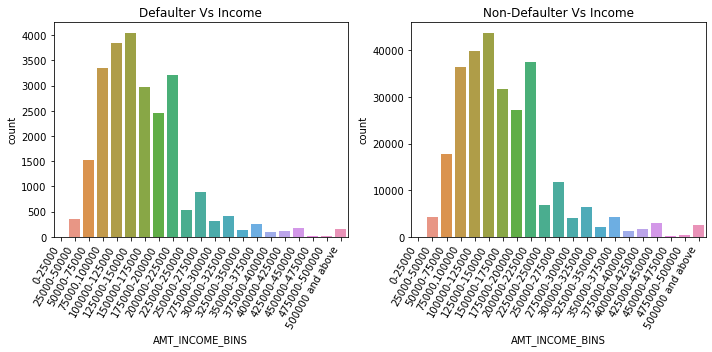

In [76]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Defaulter Vs Income")
ax=sns.countplot('AMT_INCOME_BINS', data=Defaulter)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.subplot(1,2,2)
plt.title("Non-Defaulter Vs Income")
ax=sns.countplot('AMT_INCOME_BINS', data=Non_Defaulter)
ax.set_xticklabels(ax.get_xticklabels(), rotation=60, ha="right")
plt.tight_layout()
plt.show()

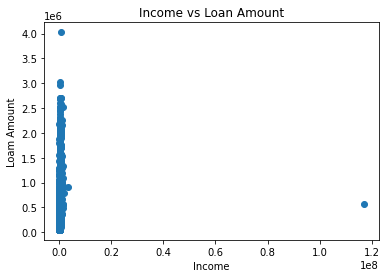

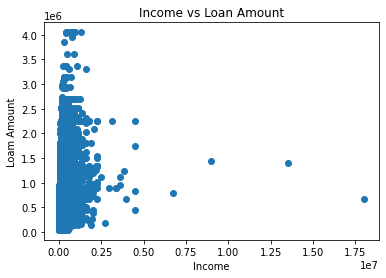

In [77]:
#Numeric - Numeric relation.
# Income vs Loan Amount
plt.scatter(Defaulter['AMT_INCOME_TOTAL'],Defaulter['AMT_CREDIT'])
plt.xlabel('Income')
plt.ylabel('Loam Amount')
plt.title('Income vs Loan Amount')
plt.show()

# Income vs Loan Amount
plt.scatter(Non_Defaulter['AMT_INCOME_TOTAL'],Non_Defaulter['AMT_CREDIT'])
plt.xlabel('Income')
plt.ylabel('Loam Amount')
plt.title('Income vs Loan Amount')
plt.show()

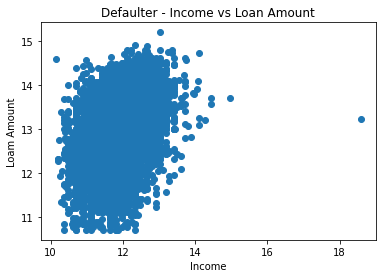

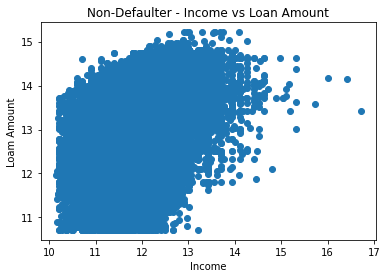

In [78]:
# Income vs Loan Amount using log function to observe natural logarithm
plt.scatter(np.log(Defaulter['AMT_INCOME_TOTAL']),np.log(Defaulter['AMT_CREDIT']))
plt.xlabel('Income')
plt.ylabel('Loam Amount')
plt.title('Defaulter - Income vs Loan Amount')
plt.show()

# Income vs Loan Amount
plt.scatter(np.log(Non_Defaulter['AMT_INCOME_TOTAL']),np.log(Non_Defaulter['AMT_CREDIT']))
plt.xlabel('Income')
plt.ylabel('Loam Amount')
plt.title('Non-Defaulter - Income vs Loan Amount')
plt.show()

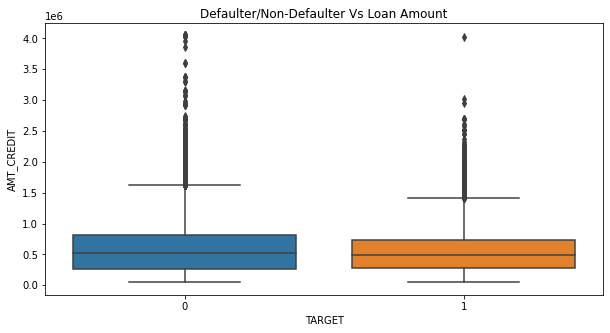

In [79]:
#Defaulter/non-defaulter vs loan_amount :  (Categorical vs numerical):
plt.figure(figsize=(10,5))
plt.title('Defaulter/Non-Defaulter Vs Loan Amount')
sns.boxplot(data=app_data,x='TARGET',y='AMT_CREDIT')
plt.show()

In [80]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [81]:
#calculate the mean, median and 75th percentile of loan amount with response
app_data.groupby("TARGET")["AMT_CREDIT"].aggregate(["mean","median",p75])

,mean,median,p75
TARGET,,,
0,602648.282002,517788.0,810000.0
1,557778.527674,497520.0,733315.5


# Multivariate Analysis: 

                                           TARGET
NAME_EDUCATION_TYPE           CODE_GENDER        
Academic degree               F                 3
                              M                 0
Higher education              F              2438
                              M              1571
Incomplete higher             F               504
                              M               368
Lower secondary               F               214
                              M               203
Secondary / secondary special F             11011
                              M              8513
                                                  TARGET
NAME_EDUCATION_TYPE           CODE_GENDER TARGET        
Academic degree               F           0           97
                              M           0           64
Higher education              F           0        47852
                              M           0        23002
Incomplete higher             F           0         5780
 

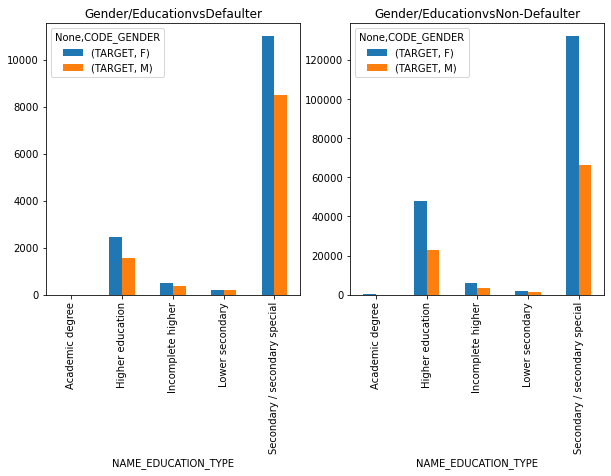

In [82]:
#Gender-Education- Target:
    
df = pd.DataFrame(app_data.groupby(['NAME_EDUCATION_TYPE','CODE_GENDER'])['TARGET'].sum())
print(df)

df1 = pd.DataFrame(Non_Defaulter.groupby(['NAME_EDUCATION_TYPE','CODE_GENDER'])['TARGET'].value_counts())
print(df1)

fig, ax = plt.subplots(ncols = 2,figsize=(10,5))
res = pd.pivot_table(df,index=['NAME_EDUCATION_TYPE'],columns=['CODE_GENDER'],values=['TARGET'])

ax[0].set(title ='Gender/EducationvsDefaulter')
res.plot(kind='bar',ax = ax[0])

res1 = pd.pivot_table(df1,index=['NAME_EDUCATION_TYPE'],columns=['CODE_GENDER'],values=['TARGET'])
ax[1].set(title ='Gender/EducationvsNon-Defaulter')
res1.plot(kind='bar',ax = ax[1])

plt.show()

                                  TARGET
NAME_FAMILY_STATUS   CODE_GENDER        
Civil marriage       F              1753
                     M              1208
Married              F              8324
                     M              6526
Separated            F              1045
                     M               575
Single / not married F              2220
                     M              2237
Unknown              F                 0
                     M                 0
Widow                F               828
                     M               109
                                         TARGET
NAME_FAMILY_STATUS   CODE_GENDER TARGET        
Civil marriage       F           0        19017
                     M           0         7797
Married              F           0       114124
                     M           0        67458
Separated            F           0        14416
                     M           0         3734
Single / not married F           0        

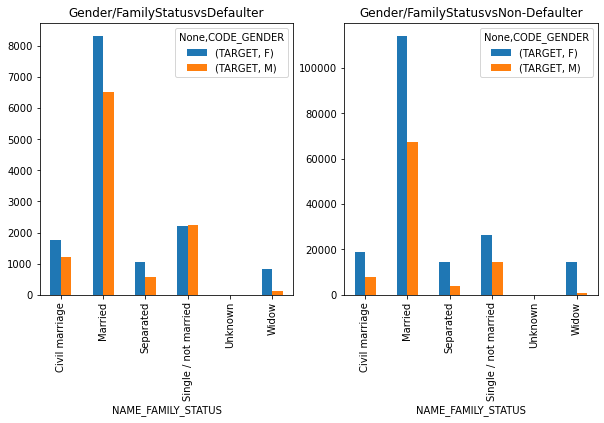

In [83]:
#Gender-FamiyStatus-Target:

df = pd.DataFrame(app_data.groupby(['NAME_FAMILY_STATUS','CODE_GENDER'])['TARGET'].sum())
print(df)

df1 = pd.DataFrame(Non_Defaulter.groupby(['NAME_FAMILY_STATUS','CODE_GENDER'])['TARGET'].value_counts())
print(df1)

fig, ax = plt.subplots(ncols = 2,figsize=(10,5))
res = pd.pivot_table(df,index=['NAME_FAMILY_STATUS'],columns=['CODE_GENDER'],values=['TARGET'])
ax[0].set(title ='Gender/FamilyStatusvsDefaulter')
res.plot(kind='bar',ax=ax[0])

res1 = pd.pivot_table(df1,index=['NAME_FAMILY_STATUS'],columns=['CODE_GENDER'],values=['TARGET'])
ax[1].set(title ='Gender/FamilyStatusvsNon-Defaulter')
res1.plot(kind='bar',ax = ax[1])

plt.show()

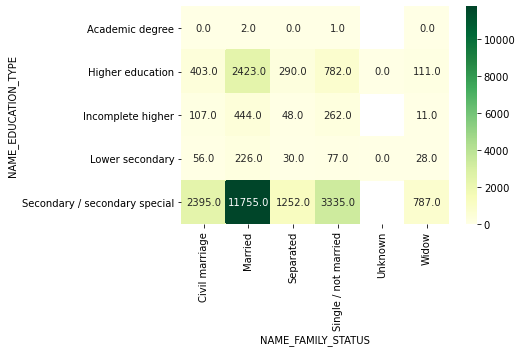

In [84]:
#Education vs family status
res = pd.pivot_table(app_data,index = "NAME_EDUCATION_TYPE",columns = "NAME_FAMILY_STATUS",values = "TARGET", aggfunc=np.sum)
sns.heatmap(res,fmt='.1f',annot = True,cmap = "YlGn")
plt.show()

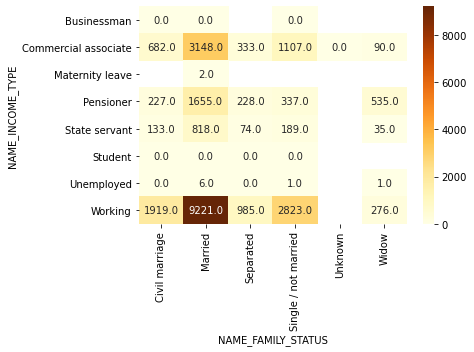

In [85]:
#Income vs Family Status
res = pd.pivot_table(app_data,index = "NAME_INCOME_TYPE",columns = "NAME_FAMILY_STATUS",values = "TARGET", aggfunc=np.sum)
sns.heatmap(res,fmt='.1f', annot = True,cmap = "YlOrBr")
plt.show()

In [86]:
# Correlation of numeric variables
Def_corr = app_data[['SK_ID_CURR','CNT_CHILDREN','TARGET','AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE',
                     'DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','REGION_RATING_CLIENT','REGION_POPULATION_RELATIVE',
                     'DAYS_ID_PUBLISH','AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK',
                     'AMT_REQ_CREDIT_BUREAU_MON','AMT_REQ_CREDIT_BUREAU_QRT']]

In [87]:
correlations = Def_corr.corr()['TARGET'].sort_values()

In [88]:
print('Most Positive Correlations:\n', correlations.tail(8))
print('\nMost Negative Correlations:\n', correlations.head(8))

Most Positive Correlations:
 AMT_REQ_CREDIT_BUREAU_HOUR    0.000930
AMT_REQ_CREDIT_BUREAU_DAY     0.002704
CNT_FAM_MEMBERS               0.009308
CNT_CHILDREN                  0.019187
DAYS_ID_PUBLISH               0.051457
REGION_RATING_CLIENT          0.058899
DAYS_EMPLOYED                 0.074958
TARGET                        1.000000
Name: TARGET, dtype: float64

Most Negative Correlations:
 DAYS_BIRTH                   -0.078239
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
AMT_CREDIT                   -0.030369
AMT_ANNUITY                  -0.012815
AMT_REQ_CREDIT_BUREAU_MON    -0.012462
AMT_INCOME_TOTAL             -0.003982
SK_ID_CURR                   -0.002108
Name: TARGET, dtype: float64


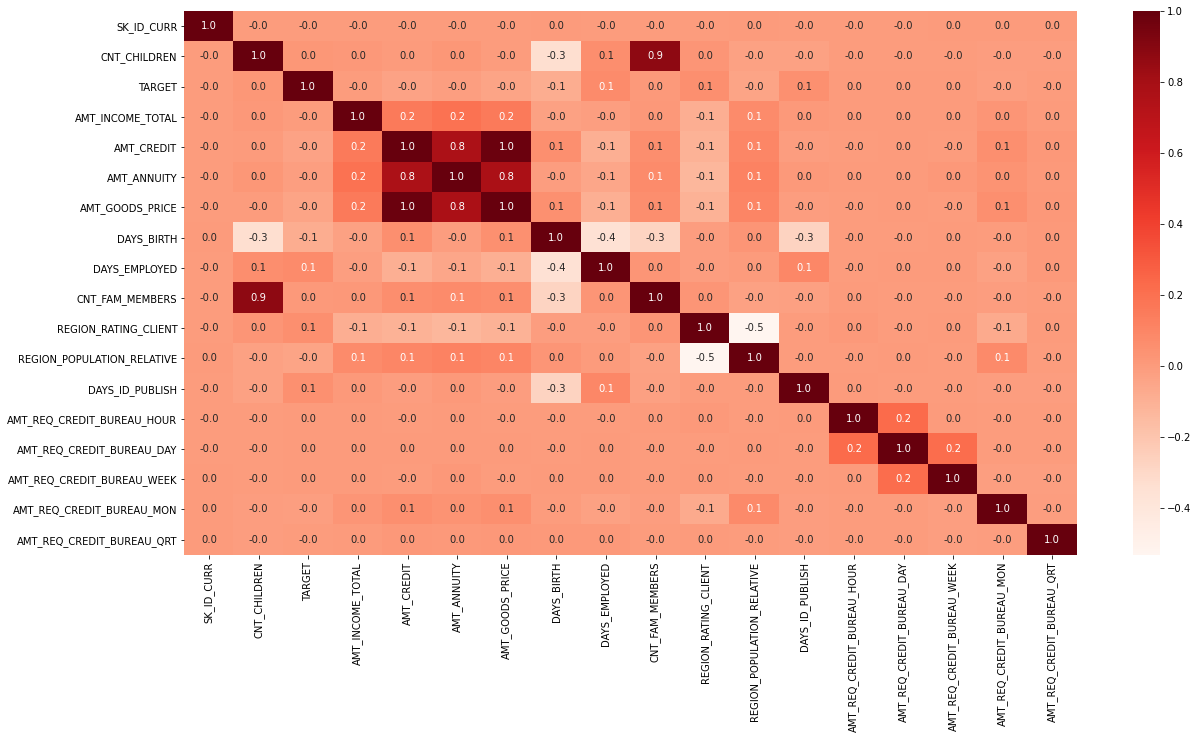

In [89]:
plt.figure(figsize=(20,10))
sns.heatmap(Def_corr.corr(),fmt='.1f',annot = True,cmap = "Reds")
plt.show()